In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC


In [47]:
chips_data = pd.read_csv("chips.csv", header=None)[1:]
chips_X = np.array(chips_data.loc[:, 0:1], dtype=np.float)
chips_y = np.array(np.where(chips_data.loc[:, 2] == 'P', 1, -1).astype(np.int8))

In [48]:
geyser_data = pd.read_csv("geyser.csv", header=None)[1:]
geyser_X = np.array(geyser_data.loc[:, 0:1], dtype=np.float)
geyser_y = np.array(np.where(geyser_data.loc[:, 2] == 'P', 1, -1).astype(np.int8))


In [49]:
def visualize(model, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000))
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)

    plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))

    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

<ipython-input-49-b3f5a4a8d3dd>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))


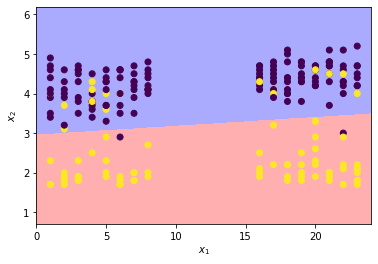

In [50]:
model = SVC(kernel='linear')
model.fit(geyser_X, geyser_y)
visualize(model, geyser_X, geyser_y)